# AutoML H2O

O AutoML do H2O pode ser usado para automatizar o fluxo de trabalho de aprendizado de máquina, que inclui treinamento e ajuste automáticos de muitos modelos dentro de um prazo especificado pelo usuário.
A versão atual do AutoML treina e valida os seguintes algoritmos (na seguinte ordem): três modelos XGBoost GBM (Gradient Boosting Machine) pré-especificados, uma grade fixa de GLMs, uma floresta aleatória padrão (DRF), cinco pré- GBMs H2O especificados, uma Rede Neural Profunda quase padrão, uma Floresta Extremamente Aleatória (XRT), uma grade aleatória de GBMs XGBoost, uma grade aleatória de GBMs H2O e uma grade aleatória de Redes Neurais Profundas. Em alguns casos, não haverá tempo suficiente para concluir todos os algoritmos; portanto, alguns podem estar ausentes na tabela de classificação. O AutoML então treina dois modelos do Stacked Ensemble (mais informações sobre os conjuntos abaixo).

Fonte e documentação detalhada : https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html


In [1]:
#@title Leitura das bibliotecas
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
##Remove qualquer outro modelo existente do H20 Python
!pip uninstall h2o
#
##instalando o módulo do H20 Python
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
#
##Verificando a versão mais recente
!python -m pip install --upgrade pip


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 128.4MB 74kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.6-py2.py3-none-any.whl size=128412300 sha256=42c0365b61f07f14d511806cc596dc2e584026ba0287f9d100061f0859453fe1
  Stored in directory: /root/.cache/pip/wheels/de/4c/dd/4813e95c4b5328b4de2e2e1aa56ca66a547f45d11fe47c3c8a
Successfully built h2o
     |████████████████████████████████| 1.5MB 2.6MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [5]:
#@title Import biblioeca H2O
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgc7tm8zl
  JVM stdout: /tmp/tmpgc7tm8zl/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgc7tm8zl/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_hmx6jl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [43]:
#@title Importando a base de treino e teste
train = h2o.import_file("/content/V2_train_df.csv")
test = h2o.import_file("/content/V2_test_df.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [20]:
for col in test.columns: 
    print(col) 

C1
evolucao_Nº. Paciente
evolucao_Nº da Intervenção
evolucao_Problema Clínico
evolucao_Infarto após Intervenção
evolucao_Óbito Hospitalar
evolucao_Complicação Vascular
evolucao_I.R.A
evolucao_I.R.A Dialítica
evolucao_A.V.C Hemorrágico
evolucao_A.V.C Isquêmico
paciente_Nº. Paciente
paciente_Idade Atual
paciente_Idade no procedimento
paciente_Frequência Cardíaca
paciente_Frequência Respiratória
paciente_Temperatura (ºC)
paciente_Peso (Kg)
paciente_Altura (metros)
paciente_Índice de Massa Corporal
paciente_Creatinina Sérica
paciente_MDRD (ml/min/173m²)
paciente_Clearance Cr (ml/min)
paciente_Pressão Arterial_min
paciente_Pressão Arterial_max
paciente_Pressão Arterial Diastólica_min
paciente_Pressão Arterial Diastólica_max
paciente_Sexo_Feminino
paciente_Sexo_Masculino
paciente_Raça_Amarelo
paciente_Raça_Branco
paciente_Raça_Mestiço
paciente_Raça_Negro
paciente_Procedência_Ambulatorial
paciente_Procedência_Internado
paciente_Grau de Instrução_1ª a 4ª série
paciente_Grau de Instrução_2º gra

In [44]:
#@title Exclusao de variáveis futuras ou que não agregam conteúdo
train = train.drop([
'evolucao_Infarto após Intervenção',
'evolucao_Óbito Hospitalar',
'evolucao_Complicação Vascular',
'evolucao_I.R.A',
'evolucao_I.R.A Dialítica',
'evolucao_A.V.C Hemorrágico',
'evolucao_A.V.C Isquêmico',
'evolucao_Nº da Intervenção',
'evolucao_Nº. Paciente',
'paciente_Nº. Paciente',
'procedimento_Nº da Intervenção',
'procedimento_Nº. Paciente',
'complicacao_Nº. Paciente',
'complicacao_Nº da Intervenção',
'balao_Nº. Paciente',
'balao_Nº da Intervenção',
'stent_Nº. Paciente',
'stent_Nº da Intervenção',
'vaso_Nº. Paciente',
'vaso_Nº da Intervenção'], axis=1)

test = test.drop([
'evolucao_Infarto após Intervenção',
'evolucao_Óbito Hospitalar',
'evolucao_Complicação Vascular',
'evolucao_I.R.A',
'evolucao_I.R.A Dialítica',
'evolucao_A.V.C Hemorrágico',
'evolucao_A.V.C Isquêmico',
'evolucao_Nº da Intervenção',
'evolucao_Nº. Paciente',
'paciente_Nº. Paciente',
'procedimento_Nº da Intervenção',
'procedimento_Nº. Paciente',
'complicacao_Nº. Paciente',
'complicacao_Nº da Intervenção',
'balao_Nº. Paciente',
'balao_Nº da Intervenção',
'stent_Nº. Paciente',
'stent_Nº da Intervenção',
'vaso_Nº. Paciente',
'vaso_Nº da Intervenção'], axis=1)

In [46]:
#@title Identificando variáveis explicativas e variável resposta
x = train.columns
y = "evolucao_Problema Clínico"
x.remove(y)

In [47]:
#@title Definindo a variável resposta como um fator
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [48]:
#@title Gerando modelo de AutoML limitando o tempo de treinamento a 1200 segundos
aml = H2OAutoML(max_runtime_secs = 1200)
aml.train(x = x, y = y,
          training_frame = train,
          leaderboard_frame = test)

AutoML progress: |███████████████████
14:16:14.215: XRT_1_AutoML_20200702_141011 [DRF XRT (Extremely Randomized Trees)] failed: java.lang.AssertionError

█████████████████████████████████████| 100%


In [49]:
#@title Visualização do melhor modelo
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20200702_141011_model_3,0.906366,0.101934,0.477831,0.20054,0.161196,0.025984
XGBoost_2_AutoML_20200702_141011,0.905992,0.106141,0.433909,0.241766,0.165596,0.0274221
XGBoost_grid__1_AutoML_20200702_141011_model_4,0.905695,0.108365,0.477034,0.211153,0.163482,0.0267263
StackedEnsemble_BestOfFamily_AutoML_20200702_141011,0.904516,0.108014,0.486988,0.202583,0.165581,0.0274171
GBM_2_AutoML_20200702_141011,0.90218,0.11431,0.425709,0.252514,0.16961,0.0287676
GBM_grid__1_AutoML_20200702_141011_model_1,0.902144,0.103572,0.45731,0.171832,0.164668,0.0271155
StackedEnsemble_AllModels_AutoML_20200702_141011,0.901052,0.107812,0.500492,0.209249,0.165331,0.0273345
GBM_grid__1_AutoML_20200702_141011_model_2,0.900305,0.106715,0.462629,0.248161,0.16433,0.0270042
XGBoost_grid__1_AutoML_20200702_141011_model_7,0.898578,0.102781,0.488637,0.235916,0.162566,0.0264275
XGBoost_grid__1_AutoML_20200702_141011_model_1,0.896899,0.111945,0.423885,0.211288,0.167926,0.0281992


In [50]:
#@title Melhor modelo
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20200702_141011_model_3


Model Summary: 


,,number_of_trees
0,,40.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.01869695384191076
RMSE: 0.136736805001107
LogLoss: 0.07281397858269
Mean Per-Class Error: 0.08969701726009327
AUC: 0.9730457360546534
AUCPR: 0.7576677811390545
Gini: 0.9460914721093068

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26225100954373676: 


,,0,1,Error,Rate
0,0,7350.0,69.0,0.0093,(69.0/7419.0)
1,1,107.0,197.0,0.352,(107.0/304.0)
2,Total,7457.0,266.0,0.0228,(176.0/7723.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.262251,0.691228,151.0
1,max f2,0.153364,0.731103,196.0
2,max f0point5,0.432320,0.774793,99.0
3,max accuracy,0.320919,0.978506,130.0
4,max precision,0.924708,1.000000,0.0
5,max recall,0.012305,1.000000,355.0
6,max specificity,0.924708,1.000000,0.0
7,max absolute_mcc,0.301333,0.685173,137.0
8,max min_per_class_accuracy,0.052645,0.909422,276.0
9,max mean_per_class_accuracy,0.052645,0.910303,276.0



Gains/Lift Table: Avg response rate:  3.94 %, avg score:  3.98 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010100,0.697779,24.753205,24.753205,0.974359,0.798795,0.974359,0.798795,0.250000,0.250000,2375.320513,2375.320513,0.249730
1,2,0.020070,0.464078,21.445446,23.109996,0.844156,0.570425,0.909677,0.685347,0.213816,0.463816,2044.544600,2210.999576,0.461929
2,3,0.030040,0.313851,13.857057,20.038977,0.545455,0.381666,0.788793,0.584556,0.138158,0.601974,1285.705742,1903.897743,0.595369
3,4,0.040010,0.212635,8.248248,17.100835,0.324675,0.258108,0.673139,0.503208,0.082237,0.684211,724.824846,1610.083461,0.670597
4,5,0.050110,0.160544,7.816802,15.229634,0.307692,0.185712,0.599483,0.439217,0.078947,0.763158,681.680162,1422.963416,0.742266
5,6,0.100091,0.065319,2.237711,8.742076,0.088083,0.098658,0.344114,0.269158,0.111842,0.875000,123.771134,774.207633,0.806662
6,7,0.150071,0.042723,1.184671,6.225115,0.046632,0.051960,0.245039,0.196821,0.059211,0.934211,18.467071,522.511466,0.816270
7,8,0.200052,0.031587,0.592335,4.817831,0.023316,0.036906,0.189644,0.156868,0.029605,0.963816,-40.766464,381.783129,0.795060
8,9,0.300013,0.020175,0.197445,3.278367,0.007772,0.025091,0.129046,0.112961,0.019737,0.983553,-80.255488,227.836727,0.711548
9,10,0.399974,0.014496,0.131630,2.491938,0.005181,0.017079,0.098090,0.088999,0.013158,0.996711,-86.836992,149.193765,0.621188




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.029731753576414426
RMSE: 0.17242898125435419
LogLoss: 0.12127159097687557
Mean Per-Class Error: 0.21578818786756626
AUC: 0.8372335699235959
AUCPR: 0.3767148891711796
Gini: 0.6744671398471918

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.188082255423069: 


,,0,1,Error,Rate
0,0,7239.0,180.0,0.0243,(180.0/7419.0)
1,1,163.0,141.0,0.5362,(163.0/304.0)
2,Total,7402.0,321.0,0.0444,(343.0/7723.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.188082,0.451200,170.0
1,max f2,0.098713,0.502270,220.0
2,max f0point5,0.445059,0.474760,86.0
3,max accuracy,0.612516,0.964263,46.0
4,max precision,0.922589,1.000000,0.0
5,max recall,0.001407,1.000000,398.0
6,max specificity,0.922589,1.000000,0.0
7,max absolute_mcc,0.188082,0.428247,170.0
8,max min_per_class_accuracy,0.026166,0.763158,312.0
9,max mean_per_class_accuracy,0.053630,0.784212,265.0



Gains/Lift Table: Avg response rate:  3.94 %, avg score:  3.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010100,0.574990,16.610703,16.610703,0.653846,0.705258,0.653846,0.705258,0.167763,0.167763,1561.070344,1561.070344,0.164124
1,2,0.020070,0.384359,10.887688,13.767657,0.428571,0.479575,0.541935,0.593144,0.108553,0.276316,988.768797,1276.765705,0.266746
2,3,0.030040,0.267122,9.567968,12.373795,0.376623,0.320324,0.487069,0.502596,0.095395,0.371711,856.796822,1137.379480,0.355671
3,4,0.040010,0.194670,7.918319,11.263530,0.311688,0.230694,0.443366,0.434841,0.078947,0.450658,691.831852,1026.353049,0.427474
4,5,0.050110,0.151344,3.582701,9.715456,0.141026,0.171733,0.382429,0.381811,0.036184,0.486842,258.270074,871.545628,0.454628
5,6,0.100091,0.066496,3.027492,6.375800,0.119171,0.096871,0.250970,0.239526,0.151316,0.638158,202.749182,537.580003,0.560115
6,7,0.150071,0.043379,0.987226,4.581158,0.038860,0.053107,0.180328,0.177440,0.049342,0.687500,-1.277441,358.115833,0.559450
7,8,0.200052,0.032301,0.987226,3.683257,0.038860,0.037171,0.144984,0.142395,0.049342,0.736842,-1.277441,268.325669,0.558786
8,9,0.300013,0.021756,0.493613,2.620501,0.019430,0.026500,0.103151,0.103780,0.049342,0.786184,-50.638720,162.050093,0.506093
9,10,0.399974,0.015808,0.427798,2.072503,0.016839,0.018528,0.081580,0.082474,0.042763,0.828947,-57.220224,107.250260,0.446551




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.95597583,0.0033295923,0.9514563,0.9553398,0.9598706,0.9546632,0.9585492
1,auc,0.83850294,0.023608219,0.84088093,0.8643607,0.8442775,0.79977894,0.84321654
2,aucpr,0.38125533,0.04508808,0.4351529,0.4154575,0.37521514,0.35830373,0.32214743
3,err,0.04402418,0.0033295923,0.048543688,0.044660196,0.04012945,0.045336787,0.041450776
4,err_count,68.0,5.147815,75.0,69.0,62.0,70.0,64.0
5,f0point5,0.4593551,0.04459403,0.4074074,0.4878049,0.5034722,0.48286605,0.4152249
6,f1,0.47206503,0.029698538,0.4680851,0.5106383,0.48333332,0.46969697,0.42857143
7,f2,0.49009788,0.049064033,0.55,0.53571427,0.46474358,0.45722714,0.44280443
8,lift_top_group,16.34675,3.2476501,21.863207,16.341347,13.579102,15.384058,14.566038
9,logloss,0.1212731,0.014699219,0.10454676,0.120902315,0.12669829,0.14271052,0.111507624



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-07-02 14:17:54,1 min 39.609 sec,0.0,0.500000,0.693147,0.500000,0.039363,1.000000,0.960637
1,,2020-07-02 14:17:55,1 min 40.263 sec,5.0,0.193228,0.184169,0.848133,0.448782,19.216304,0.043118
2,,2020-07-02 14:17:56,1 min 40.927 sec,10.0,0.164561,0.117496,0.902959,0.501944,20.519104,0.038716
3,,2020-07-02 14:17:56,1 min 41.296 sec,15.0,0.158996,0.102110,0.923962,0.543408,22.473305,0.035219
4,,2020-07-02 14:17:56,1 min 41.661 sec,20.0,0.153636,0.093513,0.941033,0.601747,23.450405,0.034961
5,,2020-07-02 14:17:57,1 min 42.042 sec,25.0,0.149095,0.087133,0.953245,0.651157,23.776105,0.032371
6,,2020-07-02 14:17:57,1 min 42.591 sec,30.0,0.144737,0.081510,0.962675,0.694644,24.753205,0.026285
7,,2020-07-02 14:17:58,1 min 43.017 sec,35.0,0.140934,0.077117,0.968011,0.722561,24.753205,0.024731
8,,2020-07-02 14:17:58,1 min 43.434 sec,40.0,0.136737,0.072814,0.973046,0.757668,24.753205,0.022789



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,complicacao_Grau-Complicação_Grave_sum,205.043518,1.000000,0.094298
1,complicacao_TipoComplicação_Isquêmica_sum,192.079788,0.936776,0.088336
2,balao_Graudeestenosepós_max,162.838318,0.794165,0.074888
3,stent_Timipós_mean,118.341843,0.577155,0.054424
4,balao_Graudeestenosepós_mean,103.089355,0.502768,0.047410
5,balao_ResultadoAngiográfico-Balão_S-Sucesso_sum,92.200325,0.449662,0.042402
6,paciente_ÍndicedeMassaCorporal,65.175720,0.317863,0.029974
7,C1,59.963230,0.292441,0.027577
8,stent_ResultadoAngiográfico-Stent_S-Sucesso_sum,56.882885,0.277419,0.026160
9,procedimento_Qtde(ml)_max,52.884338,0.257918,0.024321



See the whole table with table.as_data_frame()


In [67]:
#@title Performance na base de teste
perf = aml.leader.model_performance(test)
perf


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.02598399240480537
RMSE: 0.16119550987792858
LogLoss: 0.10193395392297616
Mean Per-Class Error: 0.15263692419296337
AUC: 0.9063656147986943
AUCPR: 0.4778309876989237
Gini: 0.8127312295973885

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1657601296901703: 


,,0,1,Error,Rate
0,0,1787.0,51.0,0.0277,(51.0/1838.0)
1,1,28.0,47.0,0.3733,(28.0/75.0)
2,Total,1815.0,98.0,0.0413,(79.0/1913.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.165760,0.543353,91.0
1,max f2,0.126833,0.601415,113.0
2,max f0point5,0.351030,0.591398,49.0
3,max accuracy,0.438356,0.968636,40.0
4,max precision,0.893057,0.857143,6.0
5,max recall,0.005888,1.000000,366.0
6,max specificity,0.917164,0.999456,0.0
7,max absolute_mcc,0.165760,0.527254,91.0
8,max min_per_class_accuracy,0.036752,0.826667,227.0
9,max mean_per_class_accuracy,0.048852,0.847363,201.0



Gains/Lift Table: Avg response rate:  3.92 %, avg score:  4.14 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010455,0.649357,19.130000,19.130000,0.750000,0.795361,0.750000,0.795361,0.200000,0.200000,1813.000000,1813.000000,0.197280
1,2,0.020387,0.470962,14.767018,17.004444,0.578947,0.537474,0.666667,0.669724,0.146667,0.346667,1376.701754,1600.444444,0.339594
2,3,0.030319,0.303271,10.739649,14.952184,0.421053,0.371655,0.586207,0.572081,0.106667,0.453333,973.964912,1395.218391,0.440276
3,4,0.040251,0.221996,8.054737,13.250216,0.315789,0.253355,0.519481,0.493434,0.080000,0.533333,705.473684,1225.021645,0.513203
4,5,0.050183,0.169592,8.054737,12.221944,0.315789,0.192129,0.479167,0.433801,0.080000,0.613333,705.473684,1122.194444,0.586130
5,6,0.100366,0.079383,2.391250,7.306597,0.093750,0.113960,0.286458,0.273880,0.120000,0.733333,139.125000,630.659722,0.658796
6,7,0.150026,0.047585,1.610947,5.421278,0.063158,0.060001,0.212544,0.203084,0.080000,0.813333,61.094737,442.127758,0.690374
7,8,0.200209,0.034178,0.265694,4.129017,0.010417,0.039706,0.161880,0.162133,0.013333,0.826667,-73.430556,312.901654,0.652020
8,9,0.300052,0.021212,0.267086,2.843949,0.010471,0.026884,0.111498,0.117129,0.026667,0.853333,-73.291449,184.394890,0.575858
9,10,0.399895,0.015365,0.534171,2.267259,0.020942,0.018050,0.088889,0.092391,0.053333,0.906667,-46.582897,126.725926,0.527450


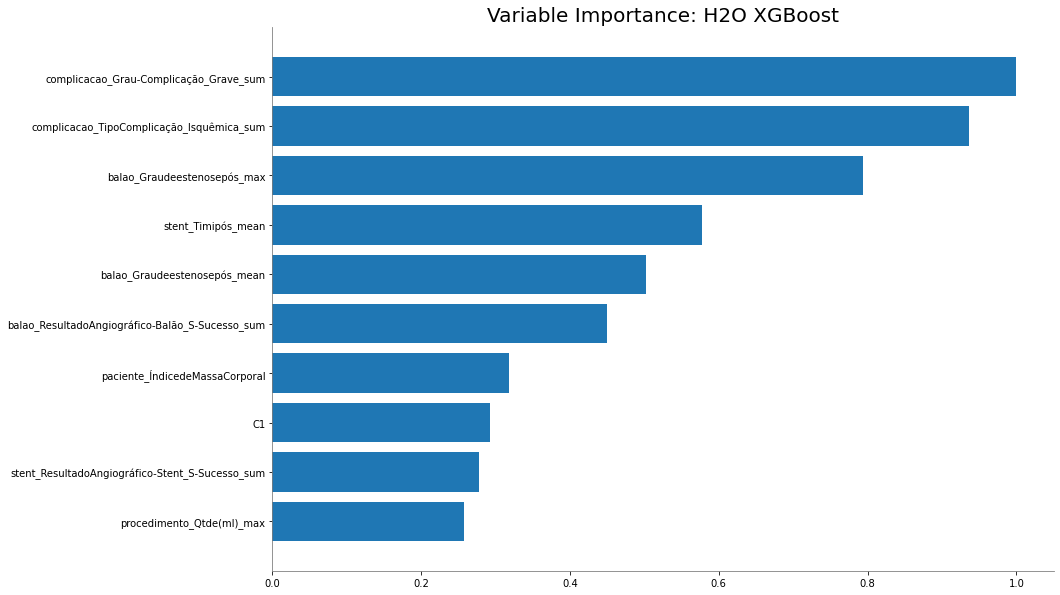

In [65]:
aml.leader.varimp_plot()

In [62]:
h2o.save_model(aml.leader, path = "./content")

'/content/content/XGBoost_grid__1_AutoML_20200702_141011_model_3'